# CS 498 PS Audio Computing Lab 0
Gizem Tabak (tabak2)

# Exercise 1: Generating and playing basic sounds

It is important to be able to generate multiple types of test sounds to test various parts of an audio processing chain. Some of the most important ones are sinusoids, chirps, and certain types of noise. For this exercise you need to generate the following test signals, at a sampling rate of 8kHz1 and for a duration of a second. Plot them if you like and see if they look right. You will probably have to zoom into the plots to check these waveforms. Also, play these sounds from your computer’s speakers (IMPORTANT: Turn your computer’s volume down, some of these sounds might be loud!)

In [94]:
%matplotlib inline
import numpy as np
import IPython
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

fs = 8000;
dt = 1./fs;
t_duration = 1.;
t = np.linspace(0, t_duration, fs);

## 1. White noise (use a random number generator)

White noise


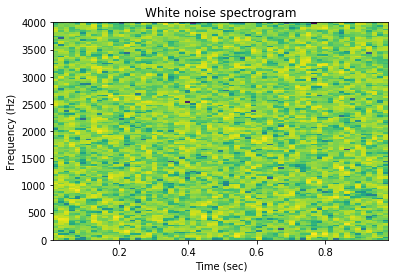

In [95]:
s_noise = np.random.randn(len(t));
print('White noise')
IPython.display.display( IPython.display.Audio( s_noise, rate=fs));
plt.specgram(s_noise.T, NFFT=256, Fs=fs, noverlap=128)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('White noise spectrogram')
plt.show()

## 2. A sinusoidal tone of frequency 440 Hz

Sine tone


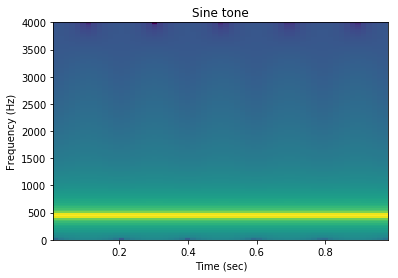

In [96]:
f = 440;
s_sin = np.sin(2*np.pi*f*t);
print('Sine tone')
IPython.display.display( IPython.display.Audio( s_sin, rate=fs));
plt.specgram(s_sin, NFFT=256, Fs=fs, noverlap=128)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Sine tone')
plt.show()

## 3. A linear chirp from 0 to 4kHz (do not use existing chirp functions)



Chirp


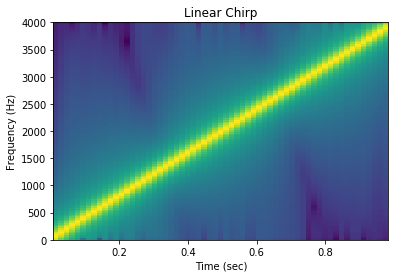

In [97]:
f0 = 0;
f1 = 4e3;
k = (f1 - f0)/(t_duration/dt);
f_chirp = np.cumsum(f0 + k*np.arange(0,t_duration/dt));
# plt.plot(f_chirp)
# plt.show()
s_chirp = np.sin(2*np.pi*dt*f_chirp);
print('Chirp')
IPython.display.display( IPython.display.Audio( s_chirp, rate=fs));
plt.specgram(s_chirp, NFFT=256, Fs=fs, noverlap=128)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Linear Chirp')
plt.show()

## 4. A sinusoidal tone with an exponentially decreasing amplitude from 100 to 0.0001

Sine wave - decreasing amplitude


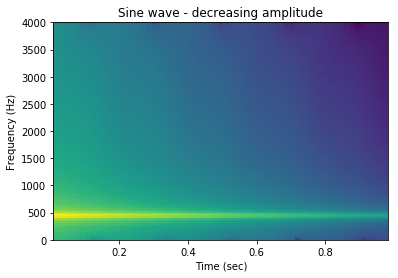

In [98]:
a0 = 2;
a1 = -4;
a = np.logspace(a0, a1, len(t));
s_amp = s_sin*a;
print('Sine wave - decreasing amplitude')
IPython.display.display( IPython.display.Audio( s_amp, rate=fs));
plt.specgram(s_amp, NFFT=256, Fs=fs, noverlap=128)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Sine wave - decreasing amplitude')
plt.show()

## Stereo

You will now make a stereo file. This is represented as a 2d array, one part containing the left channel and the other containing the right channel. For the left channel generate a quarter-second sinusoidal tone of frequency 523.24Hz with an exponentially decaying amplitude from 100 to 0.0001. For the right channel do the same thing but use a frequency of 784Hz. Start the right channel tone after a quarter second. Play this and verify that it sounds ok (it should sound like a video game “ping-pong” sound).

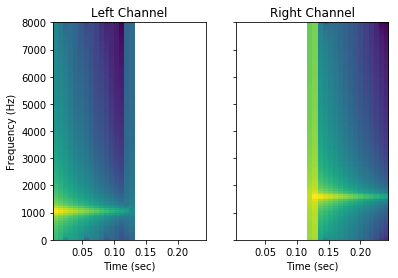

Ping-pong


In [109]:
t_stereo = np.arange(0, 0.25, dt)
a0 = 2;
a1 = -4;
a_stereo = np.logspace(a0, a1, len(t_stereo));
# Left 
f_stereo_1 = 523.24;
s_sin_1 = np.sin(2*np.pi*f_stereo_1*t_stereo);
s_stereo_1 = s_sin_1*a_stereo;
s_stereo_1_arr = np.concatenate((s_stereo_1, np.zeros(len(t_stereo)) ))
# plt.plot(s_stereo_1_arr)
# plt.show()
# Right
f_stereo_2 = 784;
s_sin_2 = np.sin(2*np.pi*f_stereo_2*t_stereo);
s_stereo_2 = s_sin_2*a_stereo;
s_stereo_2_arr = np.concatenate((np.zeros(len(t_stereo)), s_stereo_2))
# plt.plot(s_stereo_2_arr)
# plt.show()
s_stereo = np.stack((s_stereo_1_arr, s_stereo_2_arr), axis=1).T
# plt.plot(s_stereo.T)
# plt.show()
ax1 = plt.subplot(121)
plt.specgram(s_stereo[0,0:], NFFT=256, Fs=fs, noverlap=128)
plt.title('Left Channel')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
ax2 = plt.subplot(122, sharey=ax1)
plt.specgram(s_stereo[1,0:], NFFT=256, Fs=fs, noverlap=128)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.title('Right Channel')
plt.xlabel('Time (sec)')
plt.show()
print('Ping-pong')
IPython.display.display( IPython.display.Audio( s_stereo, rate=fs));


Load the provided file handel.dat. It contains a sound waveform encoded as a series of 16-bit values. Find out what it’s sample rate is (there’s no trick here, this one is trial and error).

In [100]:
s_handel = np.fromfile('handel.dat', dtype='int16', count=-1)
fs_handel = 22050
# print(len(handel))
print('Too slow')
IPython.display.display( IPython.display.Audio( s_handel, rate=fs_handel/2));
print('Too fast')
IPython.display.display( IPython.display.Audio( s_handel, rate=fs_handel*2));
print('Sounds ok')
IPython.display.display( IPython.display.Audio( s_handel, rate=fs_handel));
print('Sampling freq = %d Hz' % fs_handel)

Too slow


Too fast


Sounds ok


Sampling freq = 22050 Hz


# Exercise 2: Saving sounds

Take the “ping-pong” sound from above and save it to a WAVE file. Play the file back, or open it with an audio editor and find out if there’s anything wrong. If so, find a way to fix it.

In [101]:
print(np.shape(s_stereo))
wavfile.write('pingpong.wav', int(fs), s_stereo.T)

(2, 4000)


# Exercise 3: Basic Sound Editing

1. Load the file 1234.wav and listen to it. Clearly something is wrong. Try to fix the problem using code.

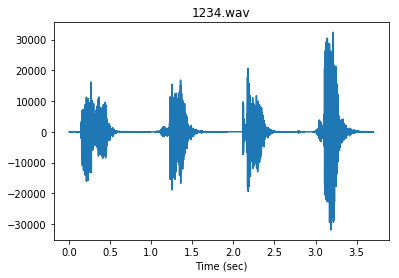

It says "One three two four". We need to change "One two three four"


In [112]:
fs_1234, wav_1324 = wavfile.read('1234.wav')
plt.plot(np.arange(0, len(wav_1324)/fs_1234, 1./fs_1234), wav_1324)
plt.xlabel('Time (sec)');
plt.title('1234.wav')
plt.show()
IPython.display.display( IPython.display.Audio( wav_1324, rate=fs_1234));
print('It says "One three two four". We need to change "One two three four"')


In [113]:
# says 1 3 2 4, change it to 1 2 3 4
# 1-2-3-4 tempo sounds uniform. we can 
# divide into 4 segments of approximately same length
N_wav = len(wav_1324)
N_approx = round(N_wav/4)
wav_1 = wav_1324[:N_approx]
wav_3 = wav_1324[N_approx:2*N_approx]
wav_2 = wav_1324[2*N_approx:3*N_approx]
wav_4 = wav_1324[3*N_approx:]
# IPython.display.display( IPython.display.Audio( wav_1, rate=fs_1234));
# IPython.display.display( IPython.display.Audio( wav_2, rate=fs_1234));
# IPython.display.display( IPython.display.Audio( wav_3, rate=fs_1234));
# IPython.display.display( IPython.display.Audio( wav_4, rate=fs_1234));
wav_1234 = np.concatenate((wav_1, wav_2, wav_3, wav_4))
# print(np.shape(wav_1234))
print('One two three four')
IPython.display.display( IPython.display.Audio( wav_1234, rate=fs_1234));

One two three four


2. Use the above file to create a countdown instead.

In [114]:
# Concatenate in reverse order
wav_4321 = np.concatenate((wav_4, wav_3, wav_2, wav_1))
# print(np.shape(wav_1234))
print('Four three two one')
IPython.display.display( IPython.display.Audio( wav_4321, rate=fs_1234));

Four three two one


3. Load the file uneven.wav. There’s something wrong here too. Fix it!

uneven.wav


Sounds like Handel with modified amplitude!


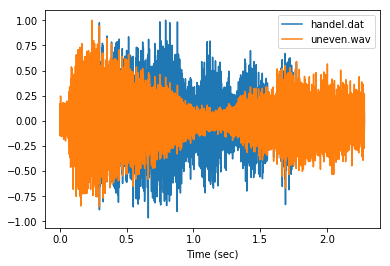

Calculate amplitude modification 1-by simply dividing signals, 2-by calculating envelopes and dividing them



/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


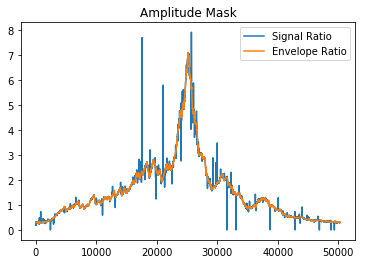

NaN element in array 'wav_even'

Correct with envelope amplitude ratios


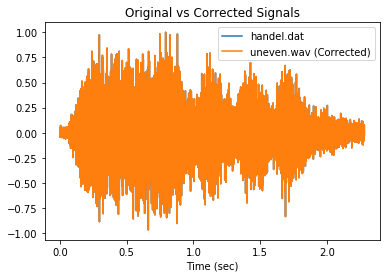

Original handel.dat


Corrected by direct amplitude division - no audio because of NaN elements


Corrected by envelope amplitude division


In [118]:
fs_uneven, wav_uneven = wavfile.read('uneven.wav')
print('uneven.wav')
IPython.display.display( IPython.display.Audio( wav_uneven, rate=fs_uneven));

# Normalize handel
s_handel = s_handel/max(s_handel)
# Sounds like Handel with modified amplitude 
print('Sounds like Handel with modified amplitude!')
plt.plot(np.arange(0, len(s_handel)/fs_handel, 1./fs_handel), s_handel)
plt.plot(np.arange(0, len(wav_uneven)/fs_uneven, 1./fs_uneven), wav_uneven)
plt.xlabel('Time (sec)');
plt.legend(['handel.dat', 'uneven.wav'])
plt.show()
# print(len(s_handel))
# print(len(wav_uneven))

print('Calculate amplitude modification 1-by simply dividing signals, 2-by calculating envelopes and dividing them\n')

# Calculate amplitude ratios
## Gives true_divide warning
a_div = np.true_divide(np.abs(s_handel), np.abs(wav_uneven))
wav_even = a_div*wav_uneven

# plt.plot(np.arange(0, len(s_handel)/fs_handel, 1./fs_handel), s_handel)
# plt.plot(np.arange(0, len(s_handel)/fs_handel, 1./fs_handel), wav_even)
# plt.xlabel('Time (sec)');
# plt.legend(['handel.dat', 'uneven.wav (corrected)'])
# plt.title()
# plt.show()

# Hilbert transform to compute envelopes
s_handel_hilb = signal.hilbert(s_handel)
wav_uneven_hilb = signal.hilbert(wav_uneven)

# Calculate envelope amplitude ratios (amplitude mask)
a_div_hilb = np.true_divide(np.abs(s_handel_hilb), np.abs(wav_uneven_hilb))
plt.plot(a_div)
plt.plot(a_div_hilb)
plt.legend(['Signal Ratio', 'Envelope Ratio'])
plt.title('Amplitude Mask')
plt.show()

if np.isnan(wav_even).any():
    print('NaN element in array \'wav_even\'\n')
    print('Correct with envelope amplitude ratios')

# Correct the signal amplitude
wav_even_hilb = a_div_hilb*wav_uneven

plt.plot(np.arange(0, len(s_handel)/fs_handel, 1./fs_handel), s_handel)
plt.plot(np.arange(0, len(s_handel)/fs_handel, 1./fs_handel), wav_even_hilb)
plt.xlabel('Time (sec)');
plt.legend(['handel.dat', 'uneven.wav (Corrected)'])
plt.title('Original vs Corrected Signals')
plt.show()

print('Original handel.dat')
IPython.display.display( IPython.display.Audio( s_handel, rate=fs_uneven));
print('Corrected by direct amplitude division - no audio because of NaN elements')
IPython.display.display( IPython.display.Audio( wav_even, rate=fs_uneven));
print('Corrected by envelope amplitude division')
IPython.display.display( IPython.display.Audio( wav_even_hilb, rate=fs_uneven));


4. Load the two files m1.wav and m2.wav. They are roughly at the same tempo and you want to make a music mix out of them. Play the first sound for two seconds, then fade it out over four seconds. While the first sound fades out the second one should fade in at the same speed. Congrats, you just learned how to (poorly) DJ in python!

m1.wav


m2.wav


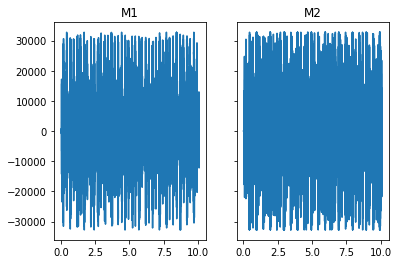

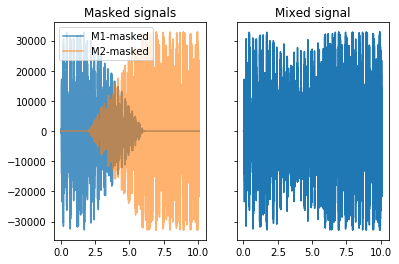

mix.wav


In [119]:
fs_m1, wav_m1 = wavfile.read('m1.wav')
fs_m2, wav_m2 = wavfile.read('m2.wav')
# print(len(wav_m1))
# print(len(wav_m1)/fs_m1)
# print(len(wav_m2))
# print(len(wav_m2)/fs_m2)


print('m1.wav')
IPython.display.display( IPython.display.Audio( wav_m1, rate=fs_m1));
print('m2.wav')
IPython.display.display( IPython.display.Audio( wav_m2, rate=fs_m2));

# Recordings are ~10secs. Find #ofsamples corresponding to 2 secs
N_2sec = int(np.round(len(wav_m1)*0.2))
# Amplitude mask = [2 secs of 1's, 4 secs of decay, 4 secs of 0's]
a1 = np.concatenate((np.ones(N_2sec), np.linspace(1, 0, N_2sec*2), np.zeros(N_2sec*2+1)) );
# Amplitude mask = [2 secs of 0's, 4 secs of increase, 4 secs of 1's]
a2 = 1. - a1

mix1 = a1[:len(wav_m1)]*wav_m1
mix2 = a2[:len(wav_m2)]*wav_m2

wav_mix = mix1 + mix2

ax1 = plt.subplot(121)
plt.plot(np.arange(0, len(wav_m1)/fs_m1, 1./fs_m1), wav_m1)
plt.title('M1')
ax2 = plt.subplot(122, sharey=ax1)
plt.plot(np.arange(0, len(wav_m2)/fs_m2, 1./fs_m2), wav_m2)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.title('M2')
plt.show()


ax1 = plt.subplot(121)
plt.plot(np.arange(0, len(mix1)/fs_m1, 1./fs_m1), mix1, alpha=0.8)
plt.plot(np.arange(0, len(mix2)/fs_m2, 1./fs_m2), mix2, alpha=0.6)
plt.legend(['M1-masked', 'M2-masked'])
plt.title('Masked signals')
ax2 = plt.subplot(122, sharey=ax1)
plt.plot(np.arange(0, len(wav_mix)/fs_m1, 1./fs_m1), wav_mix)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.title('Mixed signal')
plt.show()

print('mix.wav')
IPython.display.display( IPython.display.Audio( wav_mix, rate=fs_m2));



# Exercise 4. Real-time processing

Open an audio stream with a sample rate go 16kHz and a single channel. Use a buffer size of 1024 samples. Now we will create a loop in which we get a snippet of sound from the microphone at each pass. Inside the loop you will read from the stream (which should be taking samples off the microphone). Using this, measure the standard deviation of each incoming sound snippet of sound and after eight seconds of recording plot these as a sequence.

I counted from 1 to 8 during streaming


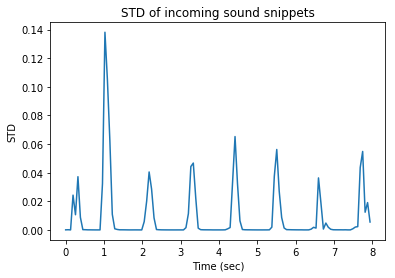

In [120]:
import sounddevice as sd

fs = 16000
bs = 1024
# print(sd.query_devices())

s = sd.Stream(samplerate=fs, blocksize=bs, channels=1)
std_in = np.zeros(int(8*fs/bs),)
s.start()
for i in range(0, int(8*fs/bs)):
    data, isOf = s.read(bs)
    std_in[i] = np.std(data)
    if isOf:
        print('Buffer overflow')
s.stop()
# I counted from 1 to 8 during streaming
print('I counted from 1 to 8 during streaming')
plt.plot(np.arange(0, 8, bs/fs), std_in)
plt.xlabel('Time (sec)')
plt.ylabel('STD')
plt.title('STD of incoming sound snippets')
plt.show()

Now let’s try to add some output as well. We will make a robot voice effect that makes use of a ring modulator. This is the same effect that’s been used to generate robot voices for many older films and TV shows (e.g. the Daleks in Dr. Who).

We will reuse the loop that we made above, but this time we will additionally have an audio output. Do the same as above, but this time you can also write to the stream to send a buffer of samples to the speaker. For a test you can simply pass the input buffer from read to write, and this would simply play from the speakers the sounds you make to the microphone (tip #1: wear headphones to avoid a feedback loop! tip #2: Every time you put on headphones set the volume to a very low value to avoid any painful surprises). Once you verify that a passthrough works, multiply each input snippet with a 440Hz sine and send that to the output to create a voice transformation. If successful, it should sound robotic. Congrats, you just made your first audio effect!

In [108]:
t_sin = np.reshape(np.arange(0, bs/fs, 1/fs), [bs, 1])
sin_eff = np.sin(2*np.pi*440*t_sin)
# needed to convert data type since it reads data f32 from mic
sin_eff = sin_eff.astype('float32')
s.start()
of = 0
uf = 0
for i in range(0, int(8*fs/bs)):
    # read from mic
    data, isOf = s.read(bs)
    # write to speaker
    isUf = s.write(data*sin_eff)
    # check if any data went missing
    if isOf:
        of += 1
        print('Mic buffer overflow')
    if isUf:
        uf += 1
        print('Speaker buffer underflow')
s.stop()
print(of)
print(uf)

0
0
